## Import libraries/packages:

In [32]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load dataset:

In [2]:
customer_data = "data_set.csv"

In [3]:
cust_df = pd.read_csv(customer_data, index_col='account_num')

## Examine dataset:

In [4]:
cust_df.head()

,base,tenure,sessions,duration,mega_bytes,case_count,comp_flag,train_flag,pcs_flag,holiday_flag,churn
account_num,,,,,,,,,,,
5969476.0,ARBLSS,124.0,"28,393.00",1.769672e+07,1.061804e+08,4.0,0.0,0.0,0.0,1.0,0.0
9411583.0,ARHOUS,30.0,"4,762.00",8.244760e+06,2.452388e+07,2.0,0.0,1.0,0.0,1.0,1.0
9211257.0,ARBLSS,34.0,"11,110.00",6.718076e+06,2.557670e+07,2.0,0.0,0.0,0.0,0.0,1.0
8015662.0,ARBLSS,31.0,"11,975.00",7.937467e+06,2.272663e+07,1.0,0.0,0.0,0.0,0.0,1.0
2341073.0,MC29PM,31.0,"3,624.00",3.106980e+06,1.998246e+07,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
cust_df.shape

(52975, 11)

In [6]:
cust_df.columns

Index(['base', 'tenure', ' sessions ', 'duration', 'mega_bytes', 'case_count',
       'comp_flag', 'train_flag', 'pcs_flag', 'holiday_flag', 'churn'],
      dtype='object')

#### Fix the 'sessions' column name

In [7]:
cust_df.columns = ['base', 'tenure', 'sessions', 'duration', 'mega_bytes',
       'case_count', 'comp_flag', 'train_flag', 'pcs_flag', 'holiday_flag',
       'churn']

In [8]:
cust_df.columns

Index(['base', 'tenure', 'sessions', 'duration', 'mega_bytes', 'case_count',
       'comp_flag', 'train_flag', 'pcs_flag', 'holiday_flag', 'churn'],
      dtype='object')

#### Check for null values:

In [9]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 52975 entries, 5969476.0 to nan
Data columns (total 11 columns):
base            52836 non-null object
tenure          52836 non-null float64
sessions        52836 non-null object
duration        52836 non-null float64
mega_bytes      52836 non-null float64
case_count      52836 non-null float64
comp_flag       52836 non-null float64
train_flag      52836 non-null float64
pcs_flag        52836 non-null float64
holiday_flag    52836 non-null float64
churn           52836 non-null float64
dtypes: float64(9), object(2)
memory usage: 4.9+ MB


Looks like there are probably a bunch of blank rows at the end since there are 52,975 rows and 52,836 non-null values for each feature, and this often happens when the original data is from a .xlsx file. Since the number of nulls is uniform across all features, we'll just use dropna.

In [10]:
cust_df = cust_df.dropna()

#### Check data types:

In [11]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 52836 entries, 5969476.0 to 1039280.0
Data columns (total 11 columns):
base            52836 non-null object
tenure          52836 non-null float64
sessions        52836 non-null object
duration        52836 non-null float64
mega_bytes      52836 non-null float64
case_count      52836 non-null float64
comp_flag       52836 non-null float64
train_flag      52836 non-null float64
pcs_flag        52836 non-null float64
holiday_flag    52836 non-null float64
churn           52836 non-null float64
dtypes: float64(9), object(2)
memory usage: 4.8+ MB


'sessions' is type 'object' but should be an integer

In [12]:
cust_df['sessions'].iloc[0]

' 28,393.00 '

In [13]:
def clean_sessions(col):
    
    col = col.strip() # strip out whitespace
    
    col = col.replace(',', '') # remove commas
    
    col = col.replace('.00', '') # remove decimals
    
    return int(col) # convert type to int

In [14]:
cust_df['sessions'] = cust_df['sessions'].apply(clean_sessions)

In [15]:
cust_df['sessions'].dtype

dtype('int64')

In [16]:
cust_df.head()

,base,tenure,sessions,duration,mega_bytes,case_count,comp_flag,train_flag,pcs_flag,holiday_flag,churn
account_num,,,,,,,,,,,
5969476.0,ARBLSS,124.0,28393,1.769672e+07,1.061804e+08,4.0,0.0,0.0,0.0,1.0,0.0
9411583.0,ARHOUS,30.0,4762,8.244760e+06,2.452388e+07,2.0,0.0,1.0,0.0,1.0,1.0
9211257.0,ARBLSS,34.0,11110,6.718076e+06,2.557670e+07,2.0,0.0,0.0,0.0,0.0,1.0
8015662.0,ARBLSS,31.0,11975,7.937467e+06,2.272663e+07,1.0,0.0,0.0,0.0,0.0,1.0
2341073.0,MC29PM,31.0,3624,3.106980e+06,1.998246e+07,0.0,0.0,0.0,0.0,0.0,1.0


Explore the tenure feature

In [17]:
len(cust_df[(cust_df['tenure'] > 61) &
       (cust_df['churn'] == 1)])

4769

Hmmm...4769 rows where tenure is more than 61 days but they are inactive by day 61? ("churn – on day 61 since Account Creation, is the account active or inactive") Not sure how this is possible. Would have to get more information. For now I'll ignore it.

In [18]:
len(cust_df[(cust_df['tenure'] < 61) &
       (cust_df['churn'] == 0)])

0

This makes sense - anywhere tenure is less than 61 days, they should all be inactive by day 61. (None of these accounts should be listed as not churning.) Since tenure is basically a proxy for churn, we should remove it from the dataset. (If we know that tenure is less than 61 days we already know that they churned.)

In [19]:
cust_df.drop('tenure', axis=1, inplace=True)

In [20]:
cust_df.shape

(52836, 10)

#### Check to see if the classes are balanced:

In [21]:
cust_df['churn'].sum()

19155.0

In [22]:
len(cust_df[cust_df['churn'] == 0])

33681

In [23]:
cust_df['churn'].sum() / len(cust_df['churn']) * 100

36.25369066545537

The classes are imbalanced - there are more customers that  don't churn (33,681) than churn (19,155) after 60 days. The churn rate is 36%.

## Initial data visualization - exploring the dataset

#### What is the distribution of accounts across all the bases?

In [24]:
bases_df = pd.DataFrame(cust_df['base'].value_counts())

In [25]:
bases_df.head()

,base
AFSHEP,6837
ARLEEE,6297
ARHOUS,4344
AFLACK,3453
AFKEES,2886


In [26]:
base_churn = pd.DataFrame(
    cust_df.groupby('base').sum()['churn'] / 
    cust_df['base'].value_counts() * 100).sort_values(by=0, ascending=False)

In [27]:
bases_churn_df = pd.merge(bases_df, base_churn, left_index=True, right_index=True)

In [28]:
bases_churn_df.columns = ['accounts', 'churn rate']

In [29]:
bases_churn_df.sort_values(by='accounts', ascending=False, inplace=True)

In [30]:
bases_churn_df.head()

,accounts,churn rate
AFSHEP,6837,27.248793
ARLEEE,6297,49.198031
ARHOUS,4344,20.718232
AFLACK,3453,41.876629
AFKEES,2886,25.987526


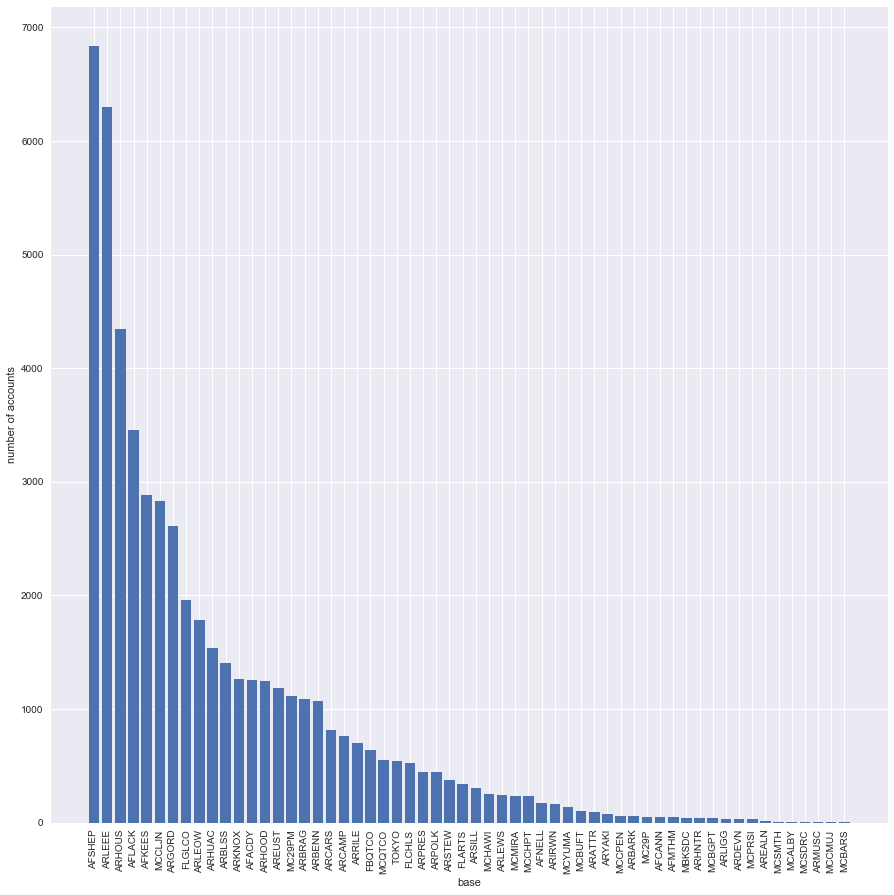

In [33]:
fig = plt.figure(figsize=(15,15))
plt.bar(list(range(len(bases_churn_df.index))), bases_churn_df['accounts'])

plt.xlabel('base')
plt.ylabel('number of accounts')
plt.xticks(range(len(bases_df.index)), bases_df.index.values, rotation='vertical')
plt.show()

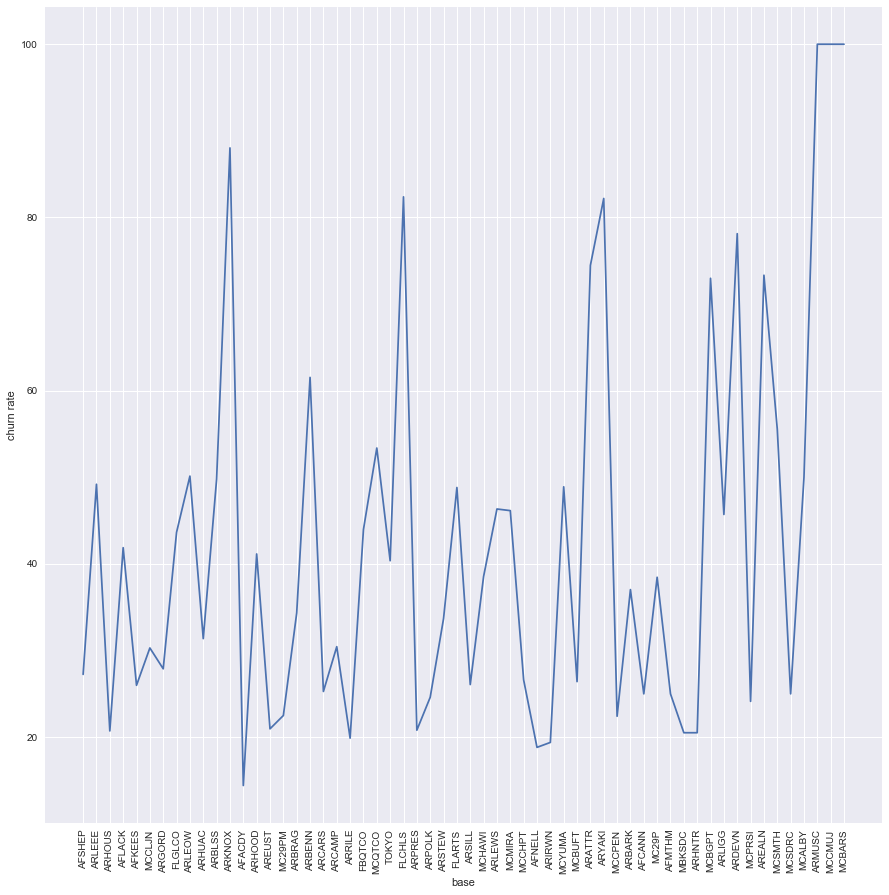

In [35]:
fig = plt.figure(figsize=(15,15))
plt.plot(list(range(len(bases_churn_df.index))), bases_churn_df['churn rate']) 
plt.xlabel('base')
plt.ylabel('churn rate')
plt.xticks(range(len(bases_churn_df.index)), bases_churn_df.index.values, rotation='vertical')
plt.show()

That's interesting - some bases have very few accounts while others have thousands. Does this correspond to the actual population differences across the bases, or are there some bases that have more customers on a single account? There are more questions we might explore with more information. We might even decide to model different types or sizes of bases separately.

Let's look at the distribution of number of sessions and duration for a random sampling of 20 bases to see how different the bases might be:

In [41]:
unique_bases = cust_df.base.unique()
unique_base_sample = np.random.choice(unique_bases, 20)

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


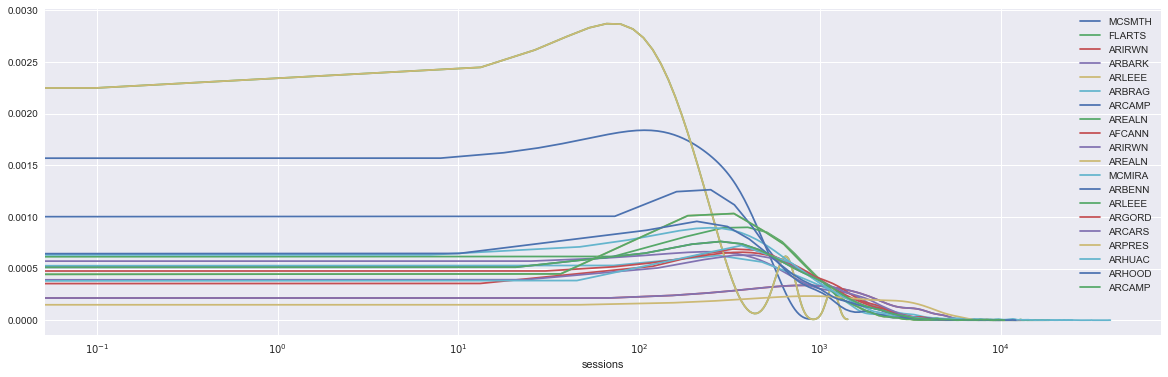

In [42]:
fig = plt.figure(figsize=(20,6))
for base in unique_base_sample:
    tmp_df = cust_df[cust_df.base == base]
    sns.distplot(tmp_df.sessions, label=base, hist=False)
    plt.xscale('log')
plt.legend()
plt.show()

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


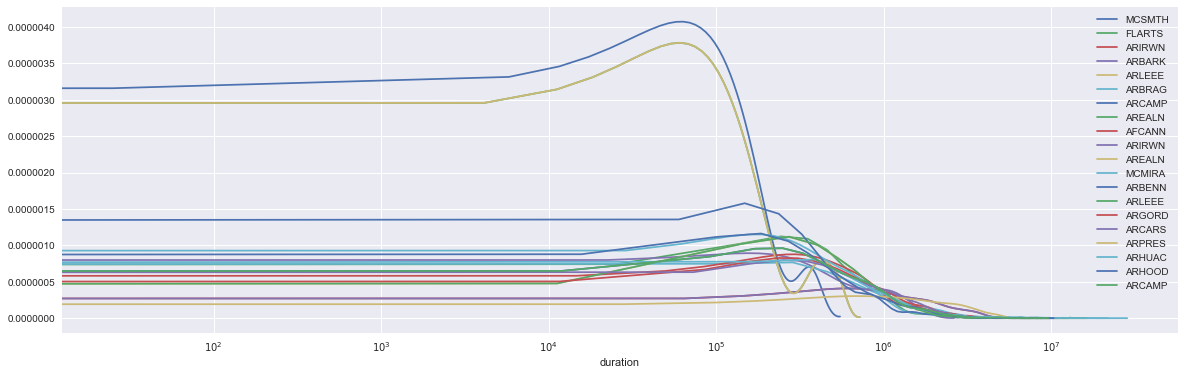

In [43]:
fig = plt.figure(figsize=(20,6))
for base in unique_base_sample:
    tmp_df = cust_df[cust_df.base == base]
    sns.distplot(tmp_df.duration, label=base, hist=False)
    plt.xscale('log')
plt.legend()
plt.show()

This gives us an intuition about how different the bases are from each other. We could dive much deeper into exploring these differences and creating some profiles for types of bases. Maybe we could define clusters of similar bases to guide how we understand and predict churn! This would be a potential next step. Might start by grouping the other features by base:

In [44]:
cust_df.groupby('base').sum()[['sessions', 'duration', 'mega_bytes', 'case_count', 'pcs_flag', 'holiday_flag', 'churn']]

,sessions,duration,mega_bytes,case_count,pcs_flag,holiday_flag,churn
base,,,,,,,
AFACDY,4057676,3.270042e+09,3.408937e+09,571.0,713.0,89.0,181.0
AFCANN,42672,3.536737e+07,7.821913e+07,21.0,21.0,3.0,13.0
AFKEES,3934621,3.381917e+09,4.366599e+09,752.0,1169.0,401.0,750.0
AFLACK,2555569,2.158576e+09,3.295519e+09,783.0,1348.0,608.0,1446.0
AFMTHM,48260,3.658482e+07,6.701560e+07,26.0,21.0,4.0,12.0
AFNELL,257920,2.042033e+08,3.671379e+08,160.0,64.0,14.0,32.0
AFSHEP,6958209,6.022649e+09,8.501433e+09,1752.0,2709.0,985.0,1863.0
ARATTR,15062,9.215987e+06,1.469132e+07,7.0,54.0,7.0,70.0
ARBARK,38701,2.807892e+07,9.089874e+06,41.0,23.0,8.0,20.0


#### How are sessions, duration, and mega-bytes distributed? It seems like these might be similar to each other since they are all measures of how much a customer is using the network.

In [45]:
level_of_use_cols = ['sessions', 'duration', 'mega_bytes']

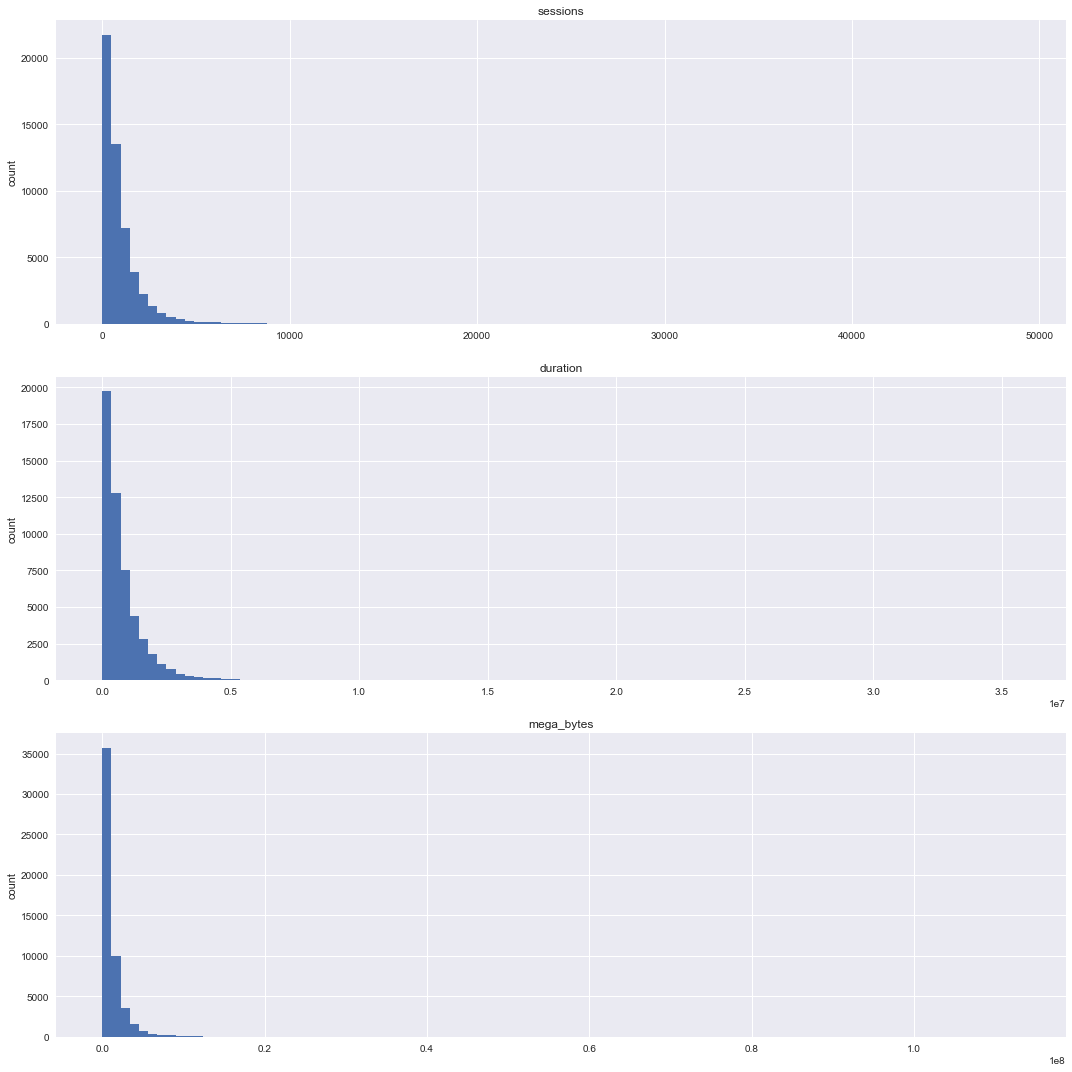

In [46]:
fig = plt.figure(figsize=(15,15))

for i, col in enumerate(level_of_use_cols):
    fig.add_subplot(3,1,1+i)
    plt.hist(cust_df[col], bins=100)
    plt.ylabel('count')
    plt.title(col)
    
fig.tight_layout()

The distributions for 'sessions', 'duration', and 'mega_bytes' are extremely skewed. This could possibly be due to data recording errors, but it could also be the case that some customers are individuals and some are organizations with multiple users. We should look at the summary of the distributions and think about what values make sense.

In [47]:
cust_df['sessions'].describe()

count    52836.000000
mean      1018.541581
std       1489.273962
min          1.000000
25%        285.000000
50%        629.000000
75%       1239.000000
max      48946.000000
Name: sessions, dtype: float64

The max number of sessions is ~49,000 - that's a lot for 30 days! Certainly infeasible for an individual customer.

In [48]:
cust_df['mega_bytes'].describe()

count    5.283600e+04
mean     1.198601e+06
std      2.102502e+06
min      0.000000e+00
25%      2.593964e+05
50%      6.541327e+05
75%      1.437785e+06
max      1.129795e+08
Name: mega_bytes, dtype: float64

In [49]:
cust_df['duration'].describe()

count    5.283600e+04
mean     8.286351e+05
std      1.129361e+06
min      2.700000e+00
25%      2.254502e+05
50%      5.204649e+05
75%      1.046996e+06
max      3.569820e+07
Name: duration, dtype: float64

The max duration ("time in minutes a customer was online during the first 30 days") is 35,698,200 - but there are only 43,200 minutes in a 30 day period.

What happens to the distributions if we drop the outliers using Tukey's method to define the upper limit for outliers as Q3 + 2 x IQR?

In [50]:
Q1, Q3 = cust_df['sessions'].quantile([.25,.75])
IQR = Q3 - Q1
upper_sessions = Q3 + (2*IQR)

In [51]:
Q1, Q3 = cust_df['duration'].quantile([.25,.75])
IQR = Q3 - Q1
upper_duration = Q3 + (2*IQR)

In [52]:
Q1, Q3 = cust_df['mega_bytes'].quantile([.25,.75])
IQR = Q3 - Q1
upper_mb = Q3 + (2*IQR)

In [53]:
no_outliers = cust_df[(cust_df['sessions'] < upper_sessions) &
                          (cust_df['duration'] < upper_duration) &
                          (cust_df['mega_bytes'] < upper_mb)]

How many rows/what percent of the data did we remove?

In [54]:
cust_df.shape[0] - no_outliers.shape[0]

4180

In [55]:
(cust_df.shape[0] - no_outliers.shape[0]) / cust_df.shape[0] * 100

7.91127261715497

8% is a large proportion of the data to remove. Let's go back and make a narrower range for outliers. 

In [56]:
Q1, Q3 = cust_df['sessions'].quantile([.25,.75])
IQR = Q3 - Q1
upper_sessions = Q3 + (3*IQR)

In [57]:
Q1, Q3 = cust_df['duration'].quantile([.25,.75])
IQR = Q3 - Q1
upper_duration = Q3 + (3*IQR)

In [58]:
Q1, Q3 = cust_df['mega_bytes'].quantile([.25,.75])
IQR = Q3 - Q1
upper_mb = Q3 + (3*IQR)

In [59]:
no_outliers = cust_df[(cust_df['sessions'] < upper_sessions) &
                          (cust_df['duration'] < upper_duration) &
                          (cust_df['mega_bytes'] < upper_mb)]

In [60]:
(cust_df.shape[0] - no_outliers.shape[0]) / cust_df.shape[0] * 100

4.553713377242789

What do the distributions look like with the outliers removed?

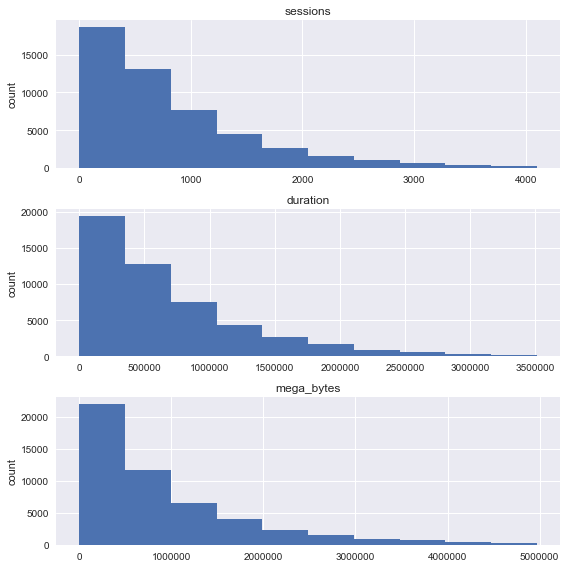

In [61]:
fig = plt.figure(figsize=(8,8))

for i, col in enumerate(level_of_use_cols):
    fig.add_subplot(3,1,1+i)
    plt.hist(no_outliers[col])
    plt.ylabel('count')
    plt.title(col)
    
fig.tight_layout()

This looks better - we will make a dataset with the outliers removed.

In [62]:
cust_no_outliers = no_outliers

In [63]:
cust_no_outliers.shape

(50430, 10)

Another next step could be to feature engineer a new feature called "level of use" that combines these three and see if it changes our models' performance.

What does the breakdown of churn look like for the level of use features?

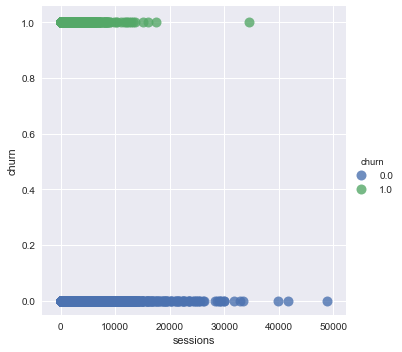

In [64]:
sns.lmplot('sessions', 'churn',
           data=cust_df,
           fit_reg=False,
           hue="churn",  
           scatter_kws={"marker": "D",
                        "s": 100})

plt.xlabel('sessions')
plt.ylabel('churn')

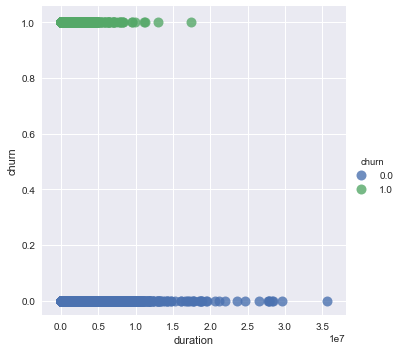

In [65]:
sns.lmplot('duration', 'churn',
           data=cust_df,
           fit_reg=False,
           hue="churn",  
           scatter_kws={"marker": "D",
                        "s": 100})

plt.xlabel('duration')
plt.ylabel('churn')

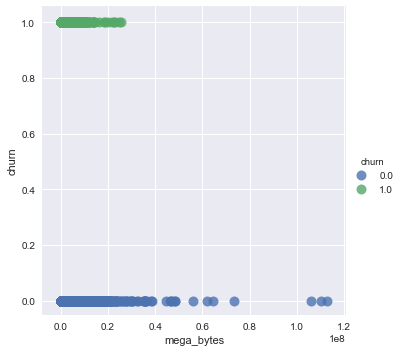

In [66]:
sns.lmplot('mega_bytes', 'churn',
           data=cust_df,
           fit_reg=False,
           hue="churn",  
           scatter_kws={"marker": "D",
                        "s": 100})

plt.xlabel('mega_bytes')
plt.ylabel('churn')

These plots also show us that the accounts at the higher range of values for sessions, duration, and mega_bytes don't churn. We would probably want to look at these accounts separately from the others. For our predictive modeling, we should focus on the "normal" customers, so we'll use the dataset with the outliers removed. This would be another next step though - do some modeling on the "outliers" to see what these accounts look like.

#### How are the features correlated with each other?

In [67]:
corr = cust_df.corr()

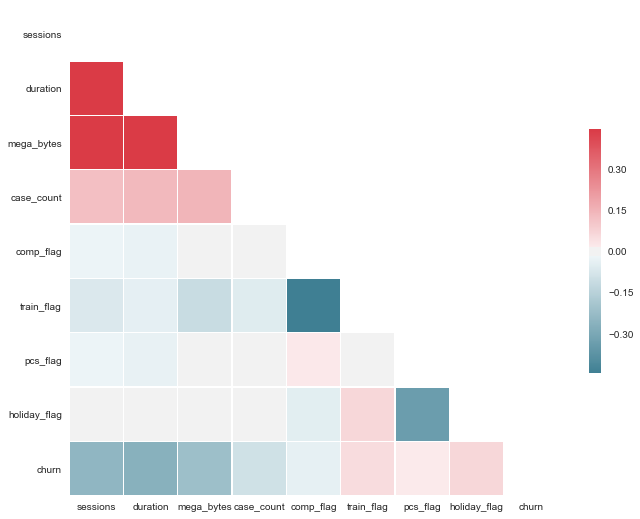

In [68]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Just as we expected: the "level of use" features (duration, mega_bytes, and sessions) are highly correlated with each other. This means that these features are redundant - they essentially contain the same information regarding likelihood that a customer will churn. We also see strong negative correlations between churn and the "level of use" features, indicating that the more the customer is using the network, the less likely they are to churn. We also see some correlation between case_count (number of times a customer called) and level of use. Finally, the features that show positive correlation with churn are if the base is a training base, and if the account was created during a season with high movement or in November or December.

#### One hot encode the categorical 'base' feature

In [70]:
base_dummies = pd.get_dummies(cust_no_outliers)

In [71]:
base_dummies.head()

,sessions,duration,mega_bytes,case_count,comp_flag,train_flag,pcs_flag,holiday_flag,churn,base_AFACDY,...,base_MCCMUJ,base_MCCPEN,base_MCHAWI,base_MCMIRA,base_MCPRSI,base_MCQTCO,base_MCSDRC,base_MCSMTH,base_MCYUMA,base_TOKYO
account_num,,,,,,,,,,,,,,,,,,,,,
2181914.0,878,1.005832e+06,4894219.706,0.0,0.0,0.0,1.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
9858995.0,240,2.289019e+05,4664070.710,0.0,0.0,1.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
6105431.0,1922,1.190221e+06,4817499.665,0.0,1.0,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
5014154.0,2444,1.791515e+06,4504119.671,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
6735499.0,1474,2.024315e+06,4919416.722,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
corr2 = base_dummies.corr()

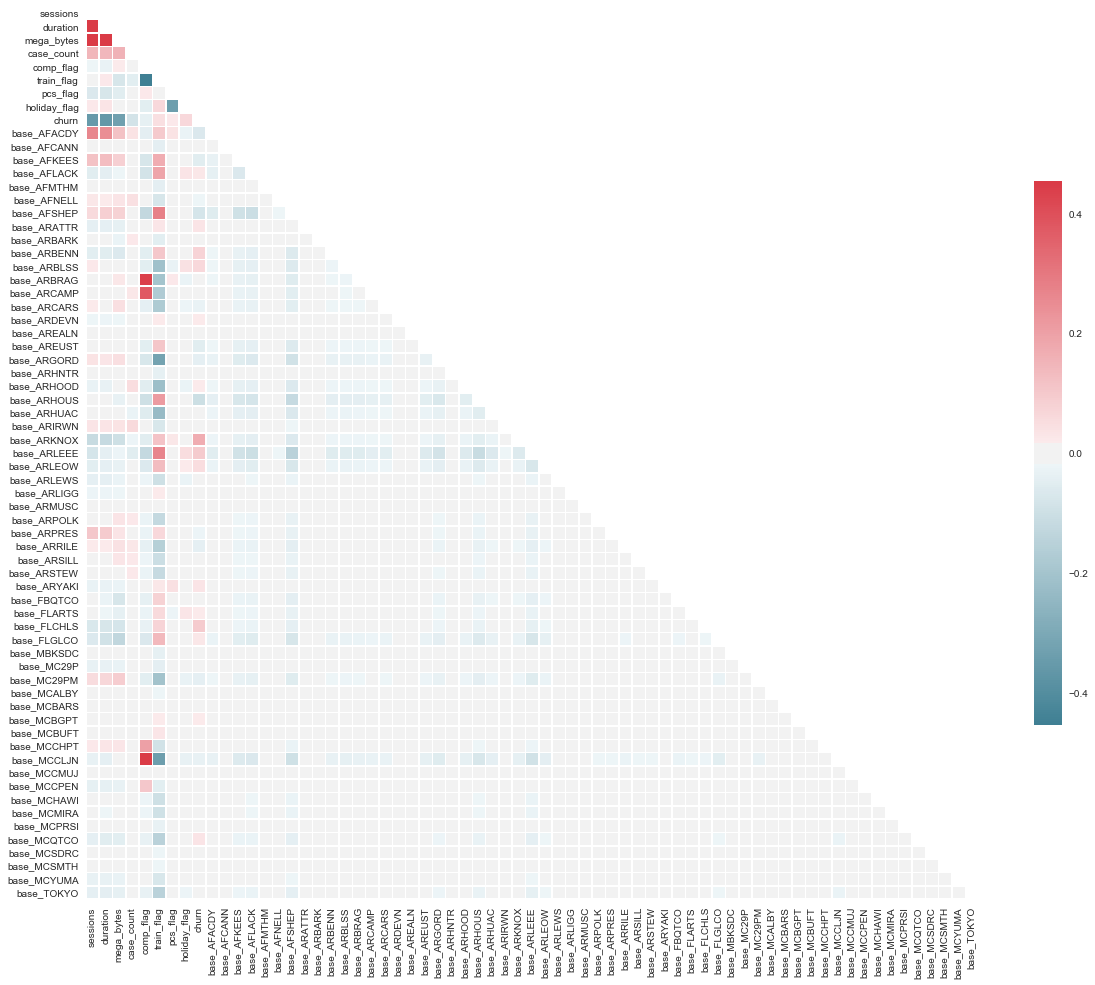

In [73]:
sns.set(style="white")
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This is harder to look at, but we see some things we would expect. The flags for whether a base is a training base or has competitors is highly correlated with certain bases - because these are properties inherent in the base, and are therefore redundant information. We also don't see much correlation between different bases, as expected. We do see some correlation between certain bases and churn (where churn is high or low for that base). Based on this information, we may want to proceed with the original dataset and not with the bases encoded as dummies (since the important properties of the bases are contained in train_flag and comp_flag). 

Save the dataframes:

In [74]:
cust_df.to_pickle('df')

In [75]:
cust_no_outliers.to_pickle('df_no_out')

In [76]:
base_dummies.to_pickle('dummies_no_out')